In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

In [4]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

DATA_PATH = './train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 3.38 s, sys: 380 ms, total: 3.76 s
Wall time: 3.76 s


In [3]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userID            int16         
 1   assessmentItemID  object        
 2   testId            object        
 3   answerCode        int8          
 4   Timestamp         datetime64[ns]
 5   KnowledgeTag      int16         
dtypes: datetime64[ns](1), int16(2), int8(1), object(2)
memory usage: 62.7+ MB


In [58]:
df.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
count,2.266586e+06,2266586,2266586,2.266586e+06,2266586,2.266586e+06
unique,NaN,9454,1537,NaN,2076774,NaN
top,NaN,A090014005,A080000128,NaN,2020-10-15 08:59:56,NaN
freq,NaN,454,3960,NaN,7,NaN
first,NaN,NaN,NaN,NaN,2019-12-31 15:08:01,NaN
last,NaN,NaN,NaN,NaN,2020-12-29 16:46:21,NaN
mean,2.087687e+03,NaN,NaN,6.543784e-01,NaN,4.909007e+03
std,1.589365e+03,NaN,NaN,4.755706e-01,NaN,3.302214e+03
min,0.000000e+00,NaN,NaN,0.000000e+00,NaN,2.300000e+01
25%,8.000000e+02,NaN,NaN,0.000000e+00,NaN,1.931000e+03


In [30]:
print(f"""--- BASIC INFORMATIONS ---
userID           : {df.userID.nunique()} # 유저(학습자) 수
assessmentItemID : {df.assessmentItemID.nunique()} # 문항 수
testID           : {df.testId.nunique()} # 시험지 문항 개수
mean answer rate : {df.answerCode.sum() / df.shape[0] * 100:.2f}% # 평균 정답률
KnowledgeTag     : {df.KnowledgeTag.nunique()} # 중분류(문제 태그) 수
{'-'*26}""")

--- BASIC INFORMATIONS ---
userID           : 6698 # 유저(학습자) 수
assessmentItemID : 9454 # 문항 수
testID           : 1537 # 시험지 문항 개수
mean answer rate : 65.44% # 평균 정답률
KnowledgeTag     : 912 # 중분류(문제 태그) 수
--------------------------


# 1.1 기본정보 파악

In [59]:
df.assessmentItemID

0          A060001001
1          A060001002
2          A060001003
3          A060001004
4          A060001005
              ...    
2266581    A030071005
2266582    A040165001
2266583    A040165002
2266584    A040165003
2266585    A040165004
Name: assessmentItemID, Length: 2266586, dtype: object

In [60]:
# 문항 일련번호 첫 자리
df.assessmentItemID.apply(lambda x: x[0]).unique()

array(['A'], dtype=object)

In [246]:
# 문항 일련번호 2~3째 자리
# 1부터 9까지의 숫자로 나뉘어있다. 어떤 feature일까?
sorted(df.assessmentItemID.apply(lambda x: x[1:4]).unique())

['010', '020', '030', '040', '050', '060', '070', '080', '090']

In [61]:
# 문항 일련번호와 시험지 번호의 겹치는 부분 (문항 일련번호에 시험지 번호가 들어가있음을 의미)
print(df['assessmentItemID'].apply(lambda x: x[1:7]) == df['testId'].apply(lambda x: x[1:4]+x[7:]))
print(sum(df['assessmentItemID'].apply(lambda x: x[1:7]) == df['testId'].apply(lambda x: x[1:4]+x[7:])))

0          True
1          True
2          True
3          True
4          True
           ... 
2266581    True
2266582    True
2266583    True
2266584    True
2266585    True
Length: 2266586, dtype: bool
2266586


In [62]:
# 시험지 번호 가운데 3자리 -> 무조건 0으로 고정
df['testId'].apply(lambda x: x[4:7]).unique()

array(['000'], dtype=object)

# 1.2 기술 통계량 분석 
- 주어진 feature(column)들에 집계함수를 이용하여 통계량을 분석합니다. 

In [64]:
def percentile(s):
    return np.sum(s) / len(s)

## 학습자 별 통계

In [67]:
# 학습자별 통계치
stu_groupby = df.groupby('userID').agg({
    'assessmentItemID': 'count', # 학습자 별 푼 문항수
    'answerCode': percentile, 
})
stu_groupby.describe()

,assessmentItemID,answerCode
count,6698.000000,6698.000000
mean,338.397432,0.628909
std,321.331429,0.159639
min,9.000000,0.000000
25%,78.000000,0.527273
50%,231.500000,0.651757
75%,513.000000,0.751203
max,1860.000000,1.000000


In [77]:
# 푼 문항수는 개인별로 9개에서 1860개까지 존재합니다.
stu_groupby.assessmentItemID.sort_values()

userID
7441       9
7390      13
7414      13
7252      13
7396      14
        ... 
926     1773
394     1774
1112    1777
481     1847
730     1860
Name: assessmentItemID, Length: 6698, dtype: int64

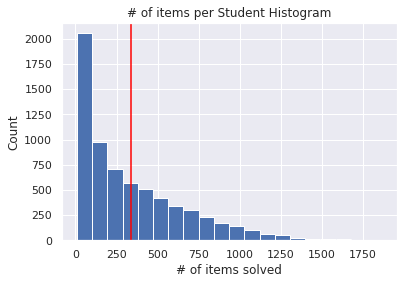

In [82]:
# 사용자 별 푼 문항수 histogram
fig, ax = plt.subplots()
stu_groupby['assessmentItemID'].hist(bins=20, ax=ax)
ax.set_title('# of items per Student Histogram')
ax.set_xlabel('# of items solved')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['assessmentItemID'].mean(), color='red') # 평균 푼 문항 개수
ax.grid(b=True)

In [69]:
# 다 틀린사람도, 다 맞춘사람도 있습니다.
stu_groupby.answerCode.sort_values()

userID
7166    0.000000
7029    0.052632
5887    0.083333
6764    0.083333
6283    0.086957
          ...   
5820    0.950495
6760    0.952381
5498    0.957746
7171    1.000000
6988    1.000000
Name: answerCode, Length: 6698, dtype: float64

In [72]:
df[df['userID']==7166]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
2261803,7166,A030126001,A030000126,0,2020-07-30 22:46:27,574
2261804,7166,A030126002,A030000126,0,2020-07-30 22:48:02,574
2261805,7166,A030126003,A030000126,0,2020-07-30 22:49:19,574
2261806,7166,A030126004,A030000126,0,2020-07-30 22:49:29,574
2261807,7166,A030126005,A030000126,0,2020-07-30 22:49:33,574
2261808,7166,A010163001,A010000163,0,2020-09-23 05:32:20,7809
2261809,7166,A010163002,A010000163,0,2020-09-23 05:32:29,7809
2261810,7166,A010163003,A010000163,0,2020-09-23 05:32:32,7809
2261811,7166,A010163004,A010000163,0,2020-09-23 05:32:33,7809
2261812,7166,A010163005,A010000163,0,2020-09-23 05:32:38,7809


In [73]:
df[df['userID']==6988]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
2257763,6988,A080002001,A080000002,1,2020-01-20 06:00:04,4605
2257764,6988,A080002002,A080000002,1,2020-01-20 06:00:06,1394
2257765,6988,A080002003,A080000002,1,2020-01-20 06:00:10,1396
2257766,6988,A080002004,A080000002,1,2020-01-20 06:00:18,1397
2257767,6988,A080002005,A080000002,1,2020-01-20 06:00:23,1396
2257768,6988,A080002006,A080000002,1,2020-01-20 06:00:26,1395
2257769,6988,A050181001,A050000181,1,2020-08-27 02:43:14,10397
2257770,6988,A050181002,A050000181,1,2020-08-27 02:46:48,10397
2257771,6988,A050181003,A050000181,1,2020-08-27 02:49:49,10397
2257772,6988,A050181004,A050000181,1,2020-08-27 02:52:22,10397


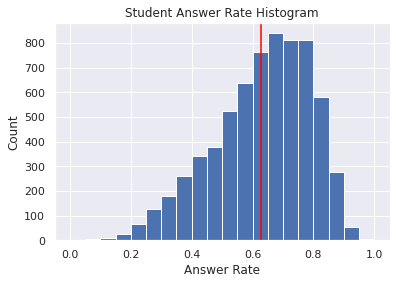

In [81]:
# 사용자 별 정답률 histogram
fig, ax = plt.subplots()
stu_groupby['answerCode'].hist(bins=20)
ax.set_title('Student Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(stu_groupby['answerCode'].mean(), color='red') # 평균 정답률
ax.grid(b=True)

## 문항별 통계

In [101]:
qst_groupby = df.groupby('assessmentItemID').agg({
    'userID': ['count','nunique'],
    'answerCode': percentile # 문항별 정답률
})
qst_groupby.describe()

userID                answerCode
             count      nunique   percentile
count  9454.000000  9454.000000  9454.000000
mean    239.748889   234.888195     0.654256
std      71.893791    69.500196     0.195488
min      43.000000    42.000000     0.049430
25%     220.000000   216.000000     0.505548
50%     230.000000   227.000000     0.666667
75%     271.000000   267.000000     0.820513
max     454.000000   442.000000     0.996310

In [105]:
print(qst_groupby['userID']['count'].sort_values())
print(qst_groupby['userID']['nunique'].sort_values())

assessmentItemID
A010180006     43
A090070001     43
A090070002     43
A090070003     43
A090070004     43
             ... 
A090014006    454
A090014005    454
A090014004    454
A090014003    454
A090014002    454
Name: count, Length: 9454, dtype: int64
assessmentItemID
A090068001     42
A090068002     42
A090068003     42
A090068004     42
A090068005     42
             ... 
A090011002    442
A090011001    442
A090011008    442
A090011003    442
A090011007    442
Name: nunique, Length: 9454, dtype: int64


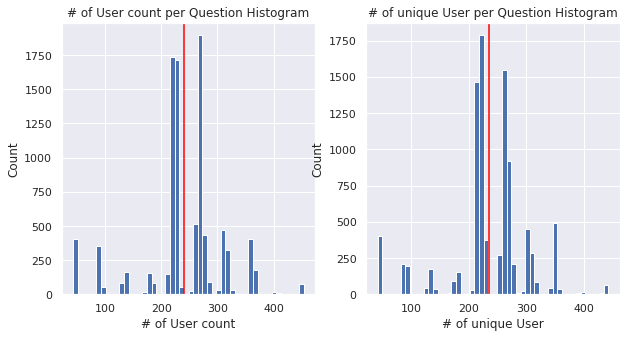

In [122]:
# 문항별 푼 사람 수 histogram
# count와 nunique가 미묘하게 다르다. 그말인 즉슨, 중복으로 문제를 푼 사람이 존재한다.
fig, axes = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

types = ['count', 'nunique']
titles = ['# of User count per Question Histogram', '# of unique User per Question Histogram']
xlabels = ['# of User count', '# of unique User']
ylabels = ['Count', 'Count']

for idx, ax in enumerate(axes):
    ax.hist(qst_groupby['userID'][types[idx]], bins=50)
    ax.set_title(titles[idx])
    ax.set_xlabel(xlabels[idx])
    ax.set_ylabel(ylabels[idx])
    ax.axvline(qst_groupby['userID'][types[idx]].mean(), color='red')
    ax.grid(b=True)

In [88]:
qst_groupby.answerCode.sort_values()

assessmentItemID
A040131005    0.049430
A020103005    0.086466
A090071004    0.088889
A040060002    0.097378
A040028002    0.101887
                ...   
A060186003    0.991111
A050169001    0.992424
A040184001    0.992565
A060002002    0.995434
A020080003    0.996310
Name: answerCode, Length: 9454, dtype: float64

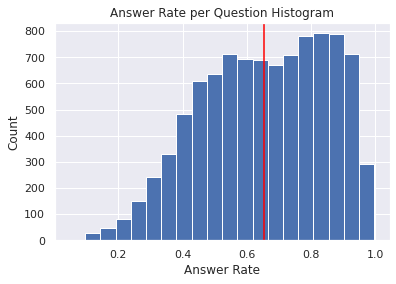

In [90]:
# 문항별 정답률 histogram
fig, ax = plt.subplots()
qst_groupby['answerCode'].hist(bins=20)
ax.set_title('Answer Rate per Question Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(qst_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

## 시험지별 통계

In [279]:
test_groupby = df.groupby('testId').agg({
    'userID': 'nunique',
    'assessmentItemID': 'nunique',
    'answerCode': percentile
})
test_groupby.describe()

,userID,assessmentItemID,answerCode
count,1537.000000,1537.000000,1537.000000
mean,237.582303,6.150943,0.667982
std,67.446371,1.434095,0.138903
min,42.000000,2.000000,0.327186
25%,217.000000,5.000000,0.561819
50%,257.000000,6.000000,0.680519
75%,268.000000,7.000000,0.778439
max,442.000000,13.000000,0.955474


In [97]:
test_groupby['userID'].sort_values()

testId
A090000068     42
A080000084     43
A090000070     43
A010000180     43
A010000179     43
             ... 
A090000013    439
A090000009    440
A090000014    441
A090000011    442
A090000015    442
Name: userID, Length: 1537, dtype: int64

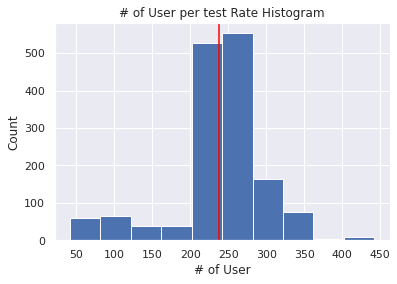

In [130]:
fig, ax = plt.subplots()
test_groupby['userID'].hist(bins=10)
ax.set_title('# of User per test Rate Histogram')
ax.set_xlabel('# of User')
ax.set_ylabel('Count')
ax.axvline(test_groupby['userID'].mean(), color='red')
ax.grid(b=True)

In [124]:
test_groupby['answerCode'].sort_values()

testId
A090000035    0.327186
A090000071    0.336111
A080000047    0.344178
A080000071    0.350895
A070000075    0.352535
                ...   
A040000188    0.940647
A060000002    0.945205
A060000001    0.947683
A010000145    0.952077
A040000187    0.955474
Name: answerCode, Length: 1537, dtype: float64

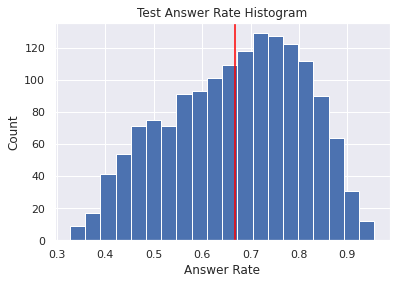

In [126]:
fig, ax = plt.subplots()
test_groupby['answerCode'].hist(bins=20)
ax.set_title('Test Answer Rate Histogram')
ax.set_xlabel('Answer Rate')
ax.set_ylabel('Count')
ax.axvline(test_groupby['answerCode'].mean(), color='red')
ax.grid(b=True)

# 1.3 EDA

## 문항을 많이 푼 학생일수록 문제를 더 맞추는가?

In [135]:
# 각 학생별로 푼 문항수를 통계내어, 그 문항수를 기준으로 다시 한번 묶어서 같은 문항수를 푼 학생들의 정답률을 평균낸다.
itemnum_ans = stu_groupby.groupby('assessmentItemID').mean()
itemnum_ans['num_items'] = itemnum_ans.index
itemnum_ans

,answerCode,num_items
assessmentItemID,,
9,0.555556,9
13,0.666667,13
14,0.629870,14
15,0.612963,15
16,0.547697,16
...,...,...
1773,0.875353,1773
1774,0.735626,1774
1777,0.656162,1777


Text(0, 0.5, 'Answer Rate')

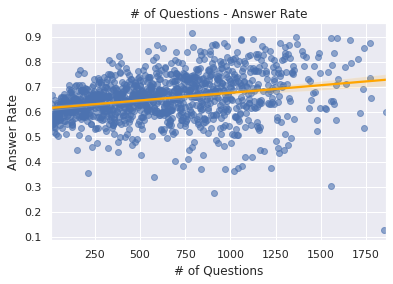

In [137]:
fig, ax = plt.subplots()
# scatter와 line을 함께 볼 수 있는 regplot
sns.regplot(data=itemnum_ans, x='num_items', y='answerCode',
           line_kws={"color": "orange"}, scatter_kws={'alpha':0.6}, ax=ax)

ax.set_title('# of Questions - Answer Rate')
ax.set_xlabel('# of Questions')
ax.set_ylabel('Answer Rate')

In [153]:
# 위 그래프도 점이 너무 많으므로, 어느정도 비슷한 문항수를 푼 학생은 한 범주로 묶어 가정하고 다시 찍어보자.
itemnum_ans = stu_groupby.groupby('assessmentItemID').mean()
bins = 300
itemnum_ans['bins'] = pd.cut(itemnum_ans.index,
                             [i * (itemnum_ans.index.max() - itemnum_ans.index.min()) // bins for i in range(bins)])

In [154]:
itemnum_ans = itemnum_ans.groupby('bins').mean()
itemnum_ans['mid'] = list(map(lambda x: (x.left + x.right)//2, itemnum_ans.index))

Text(0, 0.5, 'Answer Rate')

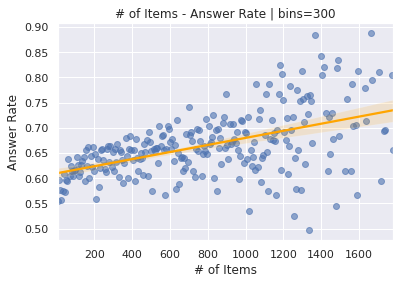

In [155]:
fig, ax = plt.subplots()
sns.regplot(data=itemnum_ans, x='mid', y='answerCode',
           line_kws={"color": "orange"}, scatter_kws={'alpha': 0.6}, ax=ax)

ax.set_title(f'# of Items - Answer Rate | bins={bins}')
ax.set_xlabel('# of Items')
ax.set_ylabel('Answer Rate')

In [156]:
# feature간의 연관도 - 푼 문항수와 정답과의 관계
print(f"Correlation between # of Tags being solved - Answer Rate: {stu_groupby.corr()['assessmentItemID']['answerCode']:.3f}")

Correlation between # of Tags being solved - Answer Rate: 0.168


## 더 많이 노출된 태그일수록 정답률이 더 높은가?

In [161]:
tag_groupby = df.groupby('KnowledgeTag').agg({
    'userID': 'count', # 한 유저에게 중복으로 노출되더라도 상관없음
    'answerCode': percentile
})
tag_groupby.describe()

,userID,answerCode
count,912.000000,912.000000
mean,2485.291667,0.615524
std,1732.086925,0.148329
min,44.000000,0.188940
25%,1025.250000,0.498239
50%,2204.000000,0.599585
75%,4052.750000,0.740288
max,12892.000000,0.977778


Text(0.5, 1.0, '# of Tags Exposed - Answer Rate')

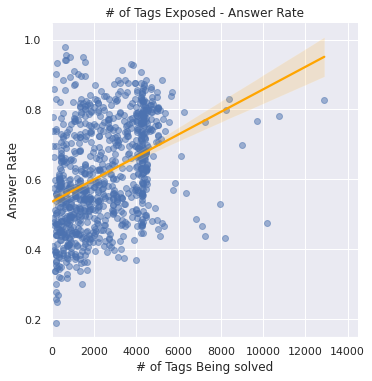

In [162]:
g = sns.lmplot(data=tag_groupby, x='userID', y='answerCode',
              scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
g.set_xlabels('# of Tags Being solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 14500))
ax = plt.gca()
ax.set_title('# of Tags Exposed - Answer Rate')

In [168]:
usernum_tag = tag_groupby.groupby('userID').mean()
bins = 150
usernum_tag['bins'] = pd.cut(usernum_tag.index,
                             [i * (usernum_tag.index.max() - usernum_tag.index.min()) // bins for i in range(bins)])

usernum_tag = usernum_tag.groupby('bins').mean()
usernum_tag['mid'] = list(map(lambda x: (x.left + x.right)//2, usernum_tag.index))

Text(0, 0.5, 'Answer Rate')

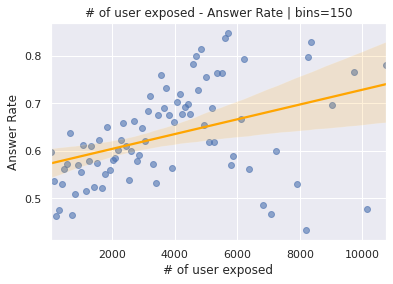

In [169]:
# 묶어서 연관지어보니, 어느정도의 연관관계는 있지만 매우 큰 요인은 아니다.(outlier가 너무 많다.)
fig, ax = plt.subplots()
sns.regplot(data=usernum_tag, x='mid', y='answerCode',
           line_kws={"color": "orange"}, scatter_kws={'alpha': 0.6}, ax=ax)

ax.set_title(f'# of user exposed - Answer Rate | bins={bins}')
ax.set_xlabel('# of user exposed')
ax.set_ylabel('Answer Rate')

## 문항을 푸는데 걸린 시간과 정답률 사이의 상관관계는?

In [171]:
diff = df.loc[:, ['userID', 'Timestamp']].groupby('userID').diff().fillna(pd.Timedelta(seconds=0))
diff = diff.fillna(pd.Timedelta(seconds=0))
diff = diff['Timestamp'].apply(lambda x: x.total_seconds())

df['elapsed'] = diff # 한 문항을 시작한 뒤 다음 문항을 시작하기까지 걸리는 시간(= 한 문항을 푸는데 경과된 시간)

elapsed_answer = df.groupby('elapsed').agg({'answerCode': percentile, 'userID': 'count'})
elapsed_hist = elapsed_answer[elapsed_answer['userID'] > 100]

(-10.0, 650.0)

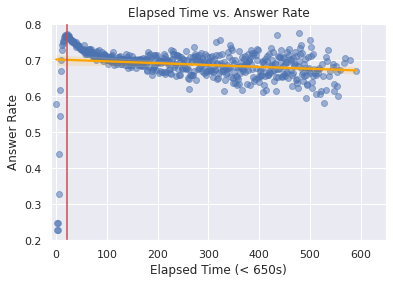

In [175]:
fig, ax = plt.subplots()
g = sns.regplot(x=elapsed_hist.index[:-1], y=elapsed_hist.answerCode.values[:-1],
            scatter_kws={'alpha':0.5}, line_kws={"color": "orange"}, ax=ax)
ax.set_title('Elapsed Time vs. Answer Rate')
ax.set_xlabel('Elapsed Time (< 650s)')
ax.set_ylabel('Answer Rate')
ax.axvline(22, color='r')
ax.set_xlim(-10, 650)

# 궁금한 점
### 하나의 시험지에는 평균적으로 몇개의 문항이 들어가 있을까? 또, 몇개의 문항태그가 달려있을까?

In [188]:
test_groupby = df.groupby('testId').agg({
    'assessmentItemID': 'nunique', # 시험지 당 할당된 문항 수
    'KnowledgeTag' : 'nunique', # 시험지 당 할당된 태그 개수
})
test_groupby.describe()

,assessmentItemID,KnowledgeTag
count,1537.000000,1537.000000
mean,6.150943,1.741705
std,1.434095,1.181580
min,2.000000,1.000000
25%,5.000000,1.000000
50%,6.000000,1.000000
75%,7.000000,2.000000
max,13.000000,8.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


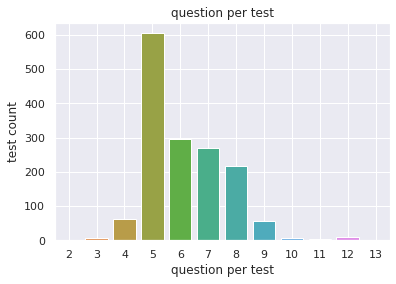

In [199]:
# 대부분이 5개에서 8개 사이. 테스트 당 문제가 그렇게 많지 않다.
fig, ax = plt.subplots()
g = sns.countplot(test_groupby['assessmentItemID'])
ax.set_title('question per test')
ax.set_xlabel('question per test')
ax.set_ylabel('test count')
ax.grid(b=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


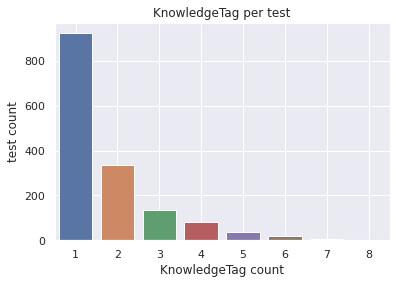

In [212]:
# 한 테스트에 속해있는 Knowledge Tag는 대부분 1~2개에 그친다.
# 총 문항수가 5~8개인 것을 고려하면 놀랍지는 않지만, 대부분의 한 테스트는 대부분 하나의 주제를 묻고있다는 것이다.
# 따라서 Knowledge Tag는 문항의 주제단원(예를 들어 일차함수의 그래프) 정도로 추측할 수 있다.
fig, ax = plt.subplots()
g = sns.countplot(test_groupby['KnowledgeTag'])
ax.set_title('KnowledgeTag per test')
ax.set_xlabel('KnowledgeTag count')
ax.set_ylabel('test count')
ax.grid(b=True)

### KnowledgeTag는 시험지별로 골고루 분포되어있는가?

In [238]:
tag_groupby = df.groupby('KnowledgeTag').agg({
    'testId' : 'nunique',
    'assessmentItemID' : 'nunique',
    'userID' : 'nunique',
})
tag_groupby.describe()

,testId,assessmentItemID,userID
count,912.000000,912.000000,912.000000
mean,2.935307,10.366228,483.335526
std,1.324092,6.622292,148.554696
min,1.000000,1.000000,42.000000
25%,2.000000,5.000000,410.000000
50%,3.000000,10.000000,504.000000
75%,3.000000,16.000000,584.000000
max,12.000000,41.000000,1027.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


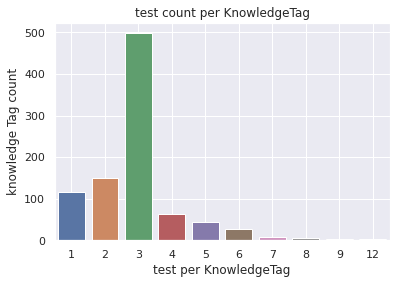

In [239]:
# 한 KnowledgeTag는 일반적으로 세 개 정도의 시험지로 이루어져있다.(500개의 knowledgeTag가 3개의 시험지를 가지고 있다.)
# 중요한 Tag는 12개씩 시험지가 있기도 하지만, 대부분 (1~)3개에 그친다. -> tag는 소단원이 아닐까?
fig, ax = plt.subplots()
g = sns.countplot(tag_groupby['testId'])
ax.set_title('test count per KnowledgeTag')
ax.set_xlabel('test per KnowledgeTag')
ax.set_ylabel('knowledge Tag count')
ax.grid(b=True)

### KnowledgeTag별 문항 수의 분포는 균등하게 나누어져있는가?

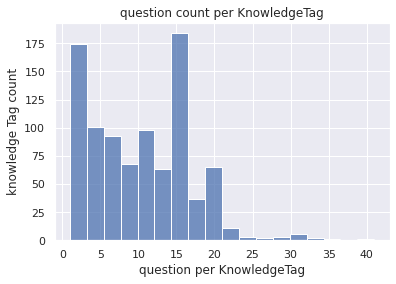

In [240]:
# Tag에 딸린 문항 수는 약 10여개로, 서너 문항부터 20문항에 이르기까지 분포가 꽤 다양하다.(=균등하지 않다)
fig, ax = plt.subplots()
g = sns.histplot(tag_groupby['assessmentItemID'])
ax.set_title('question count per KnowledgeTag')
ax.set_xlabel('question per KnowledgeTag')
ax.set_ylabel('knowledge Tag count')
ax.grid(b=True)

### KnowledgeTag별로 학습자수는 균일한가?

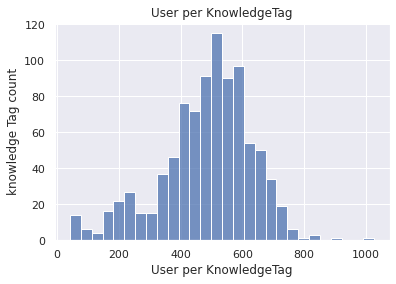

In [247]:
# knowledgeTag별 학습자 수는 정규분포를 따른다.
# 태그별로 400명대~700명 사이가 가장 많다.
# 조사 기간이 2019년 연말부터 2020년 연말까지 딱 1년이므로, 총 학습자수 7400명 가량을 9로 나누었을때 800명 가량이다.
# 보통 모든 과목을 학습하지는 않고, 각 학년별로 인원수의 편차가 있음을 감안할때, 1~9까지의 숫자는 학년일 확률이 높지 않을까?
fig, ax = plt.subplots()
g = sns.histplot(tag_groupby['userID'])
ax.set_title('User per KnowledgeTag')
ax.set_xlabel('User per KnowledgeTag')
ax.set_ylabel('knowledge Tag count')
ax.grid(b=True)

### 더 많이 노출된 시험지는 정답률이 높은가?

In [250]:
test_groupby = df.groupby('testId').agg({
    'userID' : 'count', # user와의 interaction 횟수
    'answerCode' : percentile # 시험지별 평균 정답률
})
test_groupby.describe()

,userID,answerCode
count,1537.000000,1537.000000
mean,1474.681848,0.667982
std,533.526783,0.138903
min,172.000000,0.327186
25%,1320.000000,0.561819
50%,1400.000000,0.680519
75%,1602.000000,0.778439
max,3960.000000,0.955474


In [272]:
interactionnum_ans = test_groupby.groupby('userID').mean()
bins = 200
interactionnum_ans['bins'] = pd.cut(interactionnum_ans.index,
                            [i * (interactionnum_ans.index.max() - interactionnum_ans.index.min()) // bins for i in range(bins)])
interactionnum_ans = interactionnum_ans.groupby('bins').mean()
interactionnum_ans['mid'] = list(map(lambda x: (x.left + x.right)//2, interactionnum_ans.index))

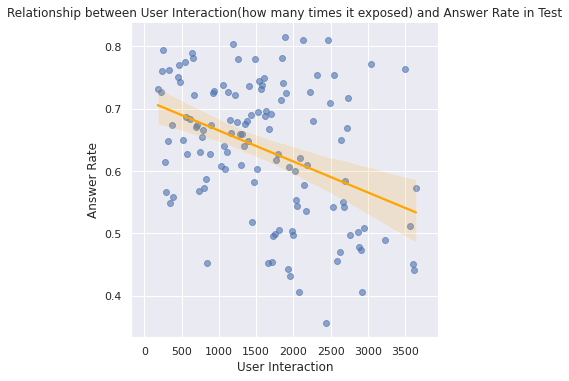

In [275]:
# 대체로 user interaction이 적은 문항들이 정답률이 높긴 하다(쉬운 문제지는 한번 풀고 넘어간다)
# 그러나, 자주 보는 경우에는 오히려 정답률이 떨어지는 경우가 있다(어려운 문제지는 여러번 푼다)
# 다만 예외가 너무 많아 경향성으로 볼 수 있을지는 의문이 있음.(많이 풀어서 쉬워지거나, 반드시 여러번 풀어야하는 핵심 개념의 문제지인 경우)
g = sns.lmplot(x='mid', y='answerCode', data=interactionnum_ans,
              line_kws={"color": "orange"}, scatter_kws={'alpha': 0.6})
g.set(title='Relationship between User Interaction(how many times it exposed) and Answer Rate in Test',
       xlabel='User Interaction',
       ylabel='Answer Rate')

In [277]:
# 음의 경향성이 있음(그러나 믿을만하지 못함)
print(f"Correlation between # of Tags being solved - Answer Rate: {test_groupby.corr()['userID']['answerCode']:.3f}")

Correlation between # of Tags being solved - Answer Rate: -0.271


### 학습자는 시험지를 받았을 때 문제를 순서대로 푸는가?

In [4]:
from tqdm.notebook import tqdm
q_nums = df.assessmentItemID.apply(lambda x: x[-2:])
q_nums_next = q_nums.shift(-1)

In [7]:
# 순서대로 풀지 않는 경우 -> 약 10만번
count = 1
for i, _ in tqdm(enumerate(range(len(q_nums)-1))):
    if  (int(q_nums[i]) +1) != int(q_nums_next[i]) and df.testId[i] == df.testId[i+1]:
        count +=1

count

105556

In [10]:
# 순서대로 풀지 않는 경우 -> 약 10만번
count = 1
for i, _ in tqdm(enumerate(range(len(q_nums)-1))):
    if (int(q_nums[i]) +1) != int(q_nums_next[i]) and df.testId[i] == df.testId[i+1]:
        print(df.testId[i], df.testId[i+1])
        print(q_nums[i], q_nums_next[i])
        count +=1
    if i==200:
        break
count

A060000001 A060000001
05 07
A080000004 A080000004
06 08
A080000004 A080000004
08 07
A080000008 A080000008
08 01
A080000012 A080000012
03 08
A080000012 A080000012
08 04
A080000014 A080000014
05 08
A080000014 A080000014
08 06
A080000016 A080000016
02 04
A080000016 A080000016
04 03
A080000016 A080000016
03 05
A080000018 A080000018
04 06
A080000018 A080000018
06 05
A080000018 A080000018
05 07
A080000020 A080000020
08 01
A080000020 A080000020
05 07
A080000020 A080000020
07 06
A080000022 A080000022
04 06
A080000022 A080000022
06 05



20

### 정답을 특별히 잘맞추는 시간대가 있을까?

In [15]:
df_for_ts = df[['answerCode','Timestamp']]
df_for_ts['hour'] = df_for_ts['Timestamp'].dt.hour
df_for_ts

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,answerCode,Timestamp,hour
0,1,2020-03-24 00:17:11,0
1,1,2020-03-24 00:17:14,0
2,1,2020-03-24 00:17:22,0
3,1,2020-03-24 00:17:29,0
4,1,2020-03-24 00:17:36,0
...,...,...,...
2266581,0,2020-06-05 06:50:21,6
2266582,1,2020-08-21 01:06:39,1
2266583,1,2020-08-21 01:06:50,1
2266584,1,2020-08-21 01:07:36,1


In [25]:
hour_groupby = df_for_ts.groupby('hour').agg({
    'answerCode' : 'mean'
}).reset_index()

In [26]:
hour_groupby

,hour,answerCode
0,0,0.649446
1,1,0.644321
2,2,0.642410
3,3,0.632685
4,4,0.633292
5,5,0.624776
6,6,0.629941
7,7,0.643050
8,8,0.667948
9,9,0.682764


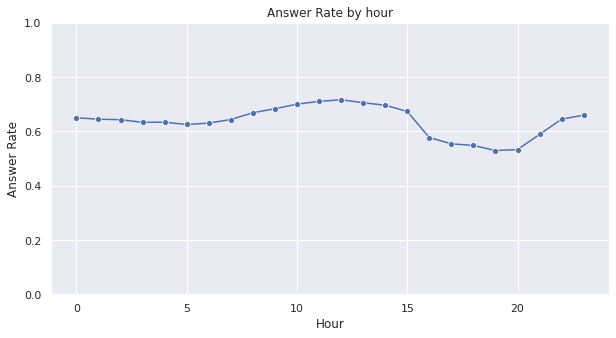

In [46]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
g = sns.lineplot(x='hour', y='answerCode',data=hour_groupby,
                marker="o")
ax.set_title('Answer Rate by hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Answer Rate')
ax.set(ylim=(0, 1))
ax.grid(b=True)